# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [3]:
learning_rate = 0.01
training_steps = 1000


In [4]:
X = np.random.randn(50)
Y = 2*X +np.random.randn(50)

#선형으로

In [5]:
W = tf.Variable(np.random.randn(), name = 'weight')
b = tf.Variable(np.random.randn(), name = 'bias')


def linear_regression(x):       # 선형함수 정의하고
    return W * x + b

def mean_square(y_pred, y_true):    # loss함수도 정의하고
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer =tf.optimizers.SGD(learning_rate) # 설정한 하이퍼 파라미터 집어넣기
                                            # optimizer도 정의하고

In [6]:
def run_optimization():
    with tf.GradientTape() as tape:
        pred = linear_regression(X)
        loss = mean_square(pred, Y) #예측값과 실제값으로 loss를..

    gradients = tape.gradient(loss,[W, b])

    optimizer.apply_gradients(zip(gradients, [W,b]))    #옵티마이저게 계속 w,b를 업데이트해준대


In [7]:
for step in range(1, training_steps + 1):
    run_optimization()

    if step % 50 == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print('step : {:4d}\tloss: {:.4f}\t: {:.4f}\tb: {:.4f}'.format(step, loss, W.numpy(), b.numpy())) # 출력할땐 깔끔하게 numpy로

step :   50	loss: 1.4016	: 1.2079	b: 0.0112
step :  100	loss: 0.8405	: 1.6764	b: 0.1945
step :  150	loss: 0.7919	: 1.8132	b: 0.2511
step :  200	loss: 0.7877	: 1.8531	b: 0.2687
step :  250	loss: 0.7874	: 1.8646	b: 0.2742
step :  300	loss: 0.7873	: 1.8680	b: 0.2760
step :  350	loss: 0.7873	: 1.8690	b: 0.2766
step :  400	loss: 0.7873	: 1.8692	b: 0.2768
step :  450	loss: 0.7873	: 1.8693	b: 0.2768
step :  500	loss: 0.7873	: 1.8693	b: 0.2769
step :  550	loss: 0.7873	: 1.8694	b: 0.2769
step :  600	loss: 0.7873	: 1.8694	b: 0.2769
step :  650	loss: 0.7873	: 1.8694	b: 0.2769
step :  700	loss: 0.7873	: 1.8694	b: 0.2769
step :  750	loss: 0.7873	: 1.8694	b: 0.2769
step :  800	loss: 0.7873	: 1.8694	b: 0.2769
step :  850	loss: 0.7873	: 1.8694	b: 0.2769
step :  900	loss: 0.7873	: 1.8694	b: 0.2769
step :  950	loss: 0.7873	: 1.8694	b: 0.2769
step : 1000	loss: 0.7873	: 1.8694	b: 0.2769


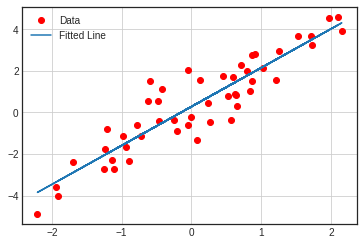

In [8]:
plt.plot(X,Y,'ro', label='Data')
plt.plot(X, np.array(W * X + b), label = 'Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [9]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [10]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [26]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [27]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-0.40120915
-0.16883767
1.4207904


### 데이터 지정

In [28]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

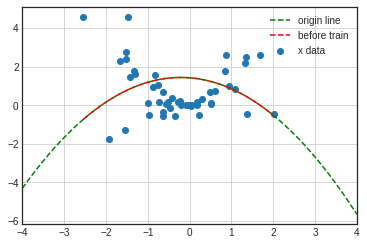

In [29]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c
x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X,Y,label = 'x data')
plt.plot(x_, y_, 'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--', label = 'before train')# 학습전의 기본선
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()


### Util Functions

In [30]:
def compute_loss():
    pred_y = a * (np.array(X)**2 + b*np.array(X) + c)
    loss = tf.reduce_mean((Y - pred_y)**2)
    return loss
    

### Optimizer

In [31]:
optimizer = Adam(learning_rate = learning_rate)

### 학습

In [32]:
for epoch in range(1, epochs + 1,1):
    optimizer. minimize(compute_loss, var_list = [a,b,c])

    if epoch % 100 == 0:
        print('epoch : {:4d}\t a : {:4f}\t b {:4f}\t c : {:4f}'.format(epoch,a.numpy(), b.numpy(),c.numpy()))

epoch :  100	 a : 0.471045	 b -0.047254	 c : 0.490521
epoch :  200	 a : 0.478605	 b -0.043623	 c : 0.452657
epoch :  300	 a : 0.478786	 b -0.043430	 c : 0.451979
epoch :  400	 a : 0.478786	 b -0.043430	 c : 0.451982
epoch :  500	 a : 0.478786	 b -0.043430	 c : 0.451982
epoch :  600	 a : 0.478786	 b -0.043430	 c : 0.451982
epoch :  700	 a : 0.478786	 b -0.043430	 c : 0.451982
epoch :  800	 a : 0.478786	 b -0.043430	 c : 0.451982
epoch :  900	 a : 0.478786	 b -0.043430	 c : 0.451982
epoch : 1000	 a : 0.478786	 b -0.043430	 c : 0.451982


### 학습 후의 회귀선

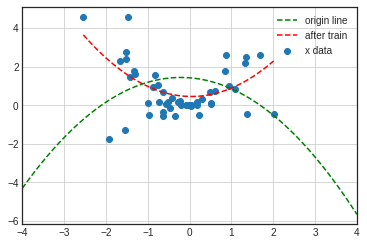

In [33]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

plt.scatter(X,Y,label = 'x data')
plt.plot(x_, y_, 'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--', label = 'after train')# 학습전의 기본선
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

# 학습한 후에 바뀐 line// non linear을 찾아냈구만!

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [34]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [46]:
num_classes = 10
num_features = 28*28

learning_rate = 0.1
training_steps = 1000
batch_size = 256


### 데이터 로드

In [47]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test,np.float32)   # float32로

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1,num_features])# 28*28은 2d인데 1d로 flatten하고

x_train, x_test = x_train / 255. , x_test / 255.    # 0~1사이로 normalization



### tf.data API 사용
- 03 에서 다시 다룸 

In [48]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


### 변수 지정

In [49]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name = 'weight')
b = tf.Variable(tf.zeros([num_classes]),name = 'bias')



### Util Functions

In [54]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

def cross_entropy(pred_y, true_y):
    true_y = tf.one_hot(true_y, depth = num_classes)   # 원핫인코딩시켜주는거
    pred_y = tf.clip_by_value(pred_y , 1e-9, 1.)   # 쿨력값의 범위를 지정 like 클립처럼

    return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [55]:
optimizer = tf.optimizers.SGD(learning_rate)


In [56]:
def run_optimization(x,y):
    with tf.GradientTape() as tape:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    gradients = tape.gradient(loss, [W,b])

    optimizer.apply_gradients(zip(gradients, [W,b]))

### 학습 진행

In [59]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)

    if step % 50 == 0 :
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred,batch_y)  # 실제값은 batch_y로
        acc = accuracy(pred, batch_y)   #마찬가지
        print('step : {:4d}\tloss: {:.4f}\taccuracy: {:4f}'.format(step,loss,acc))


step :   50	loss: 3.5925	accuracy: 0.414062
step :  100	loss: 2.5834	accuracy: 0.574219
step :  150	loss: 2.8415	accuracy: 0.527344
step :  200	loss: 1.8541	accuracy: 0.675781
step :  250	loss: 1.6068	accuracy: 0.691406
step :  300	loss: 1.4998	accuracy: 0.687500
step :  350	loss: 1.4416	accuracy: 0.703125
step :  400	loss: 1.4358	accuracy: 0.691406
step :  450	loss: 1.2373	accuracy: 0.761719
step :  500	loss: 1.3180	accuracy: 0.746094
step :  550	loss: 1.3856	accuracy: 0.750000
step :  600	loss: 1.5162	accuracy: 0.730469
step :  650	loss: 1.2425	accuracy: 0.789062
step :  700	loss: 1.2003	accuracy: 0.769531
step :  750	loss: 1.2767	accuracy: 0.753906
step :  800	loss: 1.1220	accuracy: 0.785156
step :  850	loss: 1.2501	accuracy: 0.765625
step :  900	loss: 0.9113	accuracy: 0.832031
step :  950	loss: 0.7649	accuracy: 0.816406
step : 1000	loss: 1.1596	accuracy: 0.796875


###  테스트

In [60]:
pred = logistic_regression(x_test)
print('Test accuracy : {}'.format(accuracy(pred, y_test)))

#80%의 정확도

Test accuracy : 0.8083000183105469


### 시각화

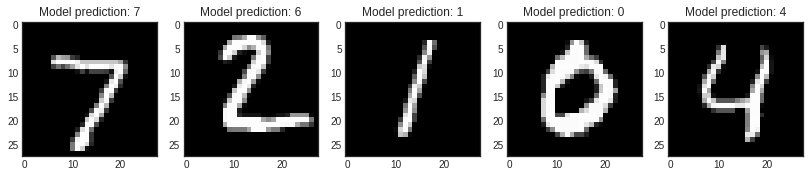

In [64]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize = (14,8))
for i in range(1,num_images +1 ,1):
    plt.subplot(1,num_images, i)
    plt.imshow(np.reshape(test_images[i-1], [28,28]), cmap='gray')
    plt.title('Model prediction: {}'.format(np.argmax(predictions. numpy()[i-1])))

plt.show()
